# Diplodatos Kaggle Competition

We present this peace of code to create the baseline for the competition, and as an example of how to deal with these kind of problems. The main goals are that you:

1. Learn
1. Try different models and see which one fits the best the given data
1. Get a higher score than the given one in the current baseline example
1. Try to get the highest score in the class :)

In [2]:
# Import the required packages
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier as RF
from ml.visualization import plot_confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

In [5]:
# load the given labels
breed = pd.read_csv('data/breed_labels.csv')
color = pd.read_csv('data/color_labels.csv')
state = pd.read_csv('data/state_labels.csv')

np.random.seed(42)

Now we take a look at the labels, just to understand what these are

In [6]:
breed.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [7]:
color.head()

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream


In [8]:
state

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan
5,41324,Melaka
6,41332,Negeri Sembilan
7,41335,Pahang
8,41330,Perak
9,41380,Perlis


And now we are ready to deal with the *original* dataset...

In [9]:
original_df = pd.read_csv('data/train.csv')

In [10]:
original_df.columns

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'Description',
       'AdoptionSpeed', 'PID'],
      dtype='object')

In [11]:
original_df.describe(include='all')

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,Description,AdoptionSpeed,PID
count,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10576,10582.000000,10582.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10002,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,For Adoption,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118,NaN,NaN
mean,1.454734,10.520412,265.469854,74.388868,1.779059,2.230675,3.236912,1.856738,1.860518,1.460971,1.729730,1.566528,1.912115,1.036666,1.584011,20.809960,41345.994613,NaN,2.518900,7477.025799
std,0.497970,18.374027,60.121490,123.434010,0.684763,1.743985,2.748595,2.974465,0.547535,0.593843,0.670791,0.701482,0.564041,0.198228,1.488348,78.397243,32.409109,NaN,1.176018,4310.921553
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,NaN,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,NaN,2.000000,3768.250000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,NaN,2.000000,7473.500000
75%,2.000000,12.000000,307.000000,188.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,NaN,4.000000,11200.750000


In [12]:
original_df.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,Description,AdoptionSpeed,PID
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,Nibble is a 3+ month old ball of cuteness. He ...,2,0
1,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,"Good guard dog, very alert, active, obedience ...",2,3
2,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,This handsome yet cute boy is up for adoption....,2,4
3,2,3,266,0,2,5,6,0,2,1,2,2,2,1,1,0,41326,This is a stray kitten that came to my house. ...,2,5
4,2,12,264,264,1,1,0,0,2,3,2,2,3,1,1,300,41326,anyone within the area of ipoh or taiping who ...,1,6


Create a function to transform the datasets. This is done by means of a function so that the transformations are the same for the training and testing datasets... We replace the encodings just to make it easy to "visualize" the data

In [13]:
def transform_data(train_data_fname, test_data_fname):
    def transform_columns(df):
        df = df.drop(["Description"], axis=1)
        df.Type = df.Type.replace({1: 'Dog', 2: 'Cat'})
        df.Gender = df.Gender.replace({1:'Male', 2:'Female', 3:'Mixed'})
        df.MaturitySize = df.MaturitySize.replace({1:'S', 2:'M', 3:'L', 4:'XL', 0:'N_A'})
        df.FurLength = df.FurLength.replace({1:'S', 2:'M', 3:'L', 0:'N_A'})
        df.Vaccinated = df.Vaccinated.replace({1:'T', 2:'F', 3:'N_A'})
        df.Dewormed = df.Dewormed.replace({1:'T', 2:'F', 3:'N_A'})
        df.Sterilized = df.Sterilized.replace({1:'T', 2:'F', 3:'N_A'})
        df.Health = df.Health.replace({1:'Healthy', 2: 'MinorInjury', 3:'SeriousInjury', 0: 'N_A'})
        df.Color1 = df.Color1.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N_A")]))
        df.Color2 = df.Color2.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N_A")]))
        df.Color3 = df.Color3.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N_A")]))
        df.Breed1 = df.Breed1.replace(dict(list(zip(breed.BreedID, breed.BreedName)) + [(0, "N_A")]))
        df.Breed2 = df.Breed2.replace(dict(list(zip(breed.BreedID, breed.BreedName)) + [(0, "N_A")]))
        df.State  = df.State.replace(dict(list(zip(state.StateID, state.StateName)) + [(0, "N_A")]))
        return df
    
    df_train = pd.read_csv(train_data_fname)
    df_train = transform_columns(df_train)
    df_test = pd.read_csv(test_data_fname)
    df_test = transform_columns(df_test)
    
    df = pd.concat([df_train, df_test], sort=True)

    # set dummy variables for everything
    # except from Age, Quantity, Fee
    df = pd.get_dummies(df)
    # get train and test back
    n = len(df_train)
    df_train = df.iloc[:n]
    df_test = df.iloc[n:]
    
    y = df_train['AdoptionSpeed']
    X = df_train.drop('AdoptionSpeed', axis=1)
    yy = None
    XX = df_test.drop('AdoptionSpeed', axis=1)
    
    return X, y, XX, yy

def normalize_cols(float_array):
    min_max_scaler = MinMaxScaler()
    return min_max_scaler.fit_transform(float_array)

Load the data...

In [14]:
X, y, XX, yy = transform_data("data/train.csv", "data/test.csv")

(array([ 285., 2177., 2846., 5274.]),
 array([0, 1, 2, 3, 4]),
 <a list of 4 Patch objects>)

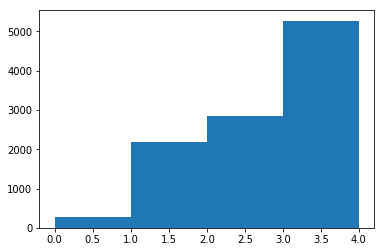

In [15]:
plt.hist(y,bins=[0,1,2,3,4])

In [14]:
X.describe(include='all')

,Age,Fee,PID,Quantity,Breed1_Abyssinian,Breed1_Affenpinscher,Breed1_Airedale Terrier,Breed1_Akita,Breed1_American Bulldog,Breed1_American Curl,...,State_Selangor,State_Terengganu,Sterilized_F,Sterilized_N_A,Sterilized_T,Type_Cat,Type_Dog,Vaccinated_F,Vaccinated_N_A,Vaccinated_T
count,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.0,10582.000000,...,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000
mean,10.520412,20.809960,7477.025799,1.584011,0.001985,0.000189,0.000095,0.000095,0.0,0.001040,...,0.580042,0.001985,0.674164,0.118976,0.206861,0.454734,0.545266,0.477036,0.126347,0.396617
std,18.374027,78.397243,4310.921553,1.488348,0.044506,0.013747,0.009721,0.009721,0.0,0.032226,...,0.493575,0.044506,0.468709,0.323775,0.405074,0.497970,0.497970,0.499496,0.332255,0.489218
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3768.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,7473.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,12.000000,0.000000,11200.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,255.000000,3000.000000,14992.000000,20.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
X.shape, XX.shape

((10582, 373), (4411, 373))

In [16]:
X_miss_val_count = X.isnull().sum()
X_miss_val_count[X_miss_val_count > 0]

Series([], dtype: int64)

In [17]:
XX_miss_val_count = XX.isnull().sum()
XX_miss_val_count[XX_miss_val_count > 0]

Series([], dtype: int64)

In [18]:
#X_zero_cols = [ col for col, is_zero in ((X == 0).sum() == X.shape[0]).items() if is_zero ]
#XX_zero_cols = [ col for col, is_zero in ((XX == 0).sum() == XX.shape[0]).items() if is_zero ]

#lst4 = [col_name for col_name in XX_zero_cols if X[col_name].sum() == 1 or X[col_name].sum() == 2 ] 
#lst4 = lst4[:56]
#X_XX_zero_cols = X_zero_cols + lst4
#X.drop(X_XX_zero_cols, axis=1, inplace=True)
#XX.drop(XX_zero_cols, axis=1, inplace=True)

In [19]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
final_cols = X.columns[model.get_support(indices=False)]
X_new = model.transform(X)
final_cols

Index(['Age', 'Fee', 'PID', 'Quantity', 'Breed1_Domestic Medium Hair',
       'Breed1_Domestic Short Hair', 'Breed1_Mixed Breed', 'Breed1_Siamese',
       'Breed1_Tabby', 'Breed2_Domestic Medium Hair',
       'Breed2_Domestic Short Hair', 'Breed2_Mixed Breed', 'Breed2_N_A',
       'Color1_Black', 'Color1_Brown', 'Color1_Cream', 'Color1_Golden',
       'Color1_Gray', 'Color1_White', 'Color1_Yellow', 'Color2_Brown',
       'Color2_Cream', 'Color2_Golden', 'Color2_Gray', 'Color2_N_A',
       'Color2_White', 'Color2_Yellow', 'Color3_Cream', 'Color3_Golden',
       'Color3_Gray', 'Color3_N_A', 'Color3_White', 'Color3_Yellow',
       'Dewormed_F', 'Dewormed_N_A', 'Dewormed_T', 'FurLength_L',
       'FurLength_M', 'FurLength_S', 'Gender_Female', 'Gender_Male',
       'Gender_Mixed', 'Health_Healthy', 'Health_MinorInjury',
       'MaturitySize_L', 'MaturitySize_M', 'MaturitySize_S', 'State_Johor',
       'State_Kuala Lumpur', 'State_Melaka', 'State_Negeri Sembilan',
       'State_Perak', 'Stat

In [20]:
X_v1 = pd.DataFrame(data=X_new, columns=final_cols)
X_v1.shape

(10582, 62)

In [21]:
XX_new = model.transform(XX)
XX_v1 = pd.DataFrame(data=XX_new, columns=final_cols)
XX_v1.shape

(4411, 62)

In [22]:
X_v1.describe(include='all')

,Age,Fee,PID,Quantity,Breed1_Domestic Medium Hair,Breed1_Domestic Short Hair,Breed1_Mixed Breed,Breed1_Siamese,Breed1_Tabby,Breed2_Domestic Medium Hair,...,State_Pulau Pinang,State_Selangor,Sterilized_F,Sterilized_N_A,Sterilized_T,Type_Cat,Type_Dog,Vaccinated_F,Vaccinated_N_A,Vaccinated_T
count,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,...,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000
mean,10.520412,20.809960,7477.025799,1.584011,0.083255,0.243716,0.399546,0.018050,0.023247,0.021546,...,0.056984,0.580042,0.674164,0.118976,0.206861,0.454734,0.545266,0.477036,0.126347,0.396617
std,18.374027,78.397243,4310.921553,1.488348,0.276280,0.429343,0.489828,0.133137,0.150694,0.145203,...,0.231822,0.493575,0.468709,0.323775,0.405074,0.497970,0.497970,0.499496,0.332255,0.489218
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3768.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,7473.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,12.000000,0.000000,11200.750000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,255.000000,3000.000000,14992.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
X_v1.shape, XX_v1.shape

((10582, 62), (4411, 62))

In [24]:
#X.Breed1_Abyssinian[X.Breed1_Abyssinian==0].count()
#X.PID.unique().size
#X[X.Sterilized_N_A==1]
#X[X.State==0].sum()
##################################
##################################

X_v1['Age'] = normalize_cols(X_v1['Age'].values.astype(float).reshape(-1, 1))
X_v1['Fee'] = normalize_cols(X_v1['Fee'].values.astype(float).reshape(-1, 1))
X_v1['Quantity'] = normalize_cols(X_v1['Quantity'].values.astype(float).reshape(-1, 1))
#X_v1.dtypes
#X_v1.describe(include='all')
XX_v1['Age'] = normalize_cols(XX_v1['Age'].values.astype(float).reshape(-1, 1))
XX_v1['Fee'] = normalize_cols(XX_v1['Fee'].values.astype(float).reshape(-1, 1))
XX_v1['Quantity'] = normalize_cols(XX_v1['Quantity'].values.astype(float).reshape(-1, 1))

Create the model and evaluate it

***ARBOL DE DECISION***

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(X_v1, y, test_size=0.1, random_state=42)

# Exploración de hiperparámetros para profundidad del arbol igual a 3

Mejor conjunto de parámetros:
{'criterion': 'gini', 'max_leaf_nodes': 30, 'min_samples_leaf': 30, 'min_samples_split': 30, 'presort': True}

Exactitud del mejor conjunto de parametros: 0.364

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de evaluacion: 0.343 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        34
         1.0       0.28      0.34      0.31       208
         2.0       0.29      0.38      0.33       292
         3.0       0.30      0.05      0.08       235
         4.0       0.43      0.59      0.50       290

   micro avg       0.34      0.34      0.34      1059
   macro avg       0.26      0.27      0.24      1059
weighted avg       0.32      0.34      0.31      1059




/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


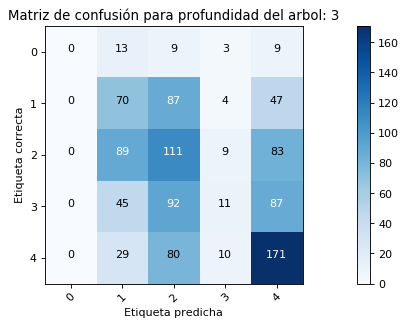


# Exploración de hiperparámetros para profundidad del arbol igual a 5

Mejor conjunto de parámetros:
{'criterion': 'entropy', 'max_leaf_nodes': 50, 'min_samples_leaf': 5, 'min_samples_split': 150, 'presort': True}

Exactitud del mejor conjunto de parametros: 0.380

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de evaluacion: 0.370 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        34
         1.0       0.36      0.28      0.31       208
         2.0       0.32      0.52      0.40       292
         3.0       0.24      0.03      0.06       235
         4.0       0.44      0.60      0.51       290

   micro avg       0.37      0.37      0.37      1059
   macro avg       0.27      0.29      0.26      1059
weighted avg       0.33      0.37      0.32      1059




/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


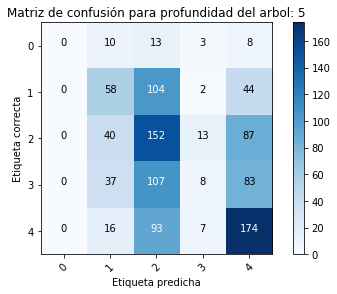


# Exploración de hiperparámetros para profundidad del arbol igual a 6

Mejor conjunto de parámetros:
{'criterion': 'gini', 'max_leaf_nodes': 30, 'min_samples_leaf': 50, 'min_samples_split': 30, 'presort': True}

Exactitud del mejor conjunto de parametros: 0.378

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de evaluacion: 0.366 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        34
         1.0       0.29      0.27      0.28       208
         2.0       0.32      0.46      0.38       292
         3.0       0.34      0.06      0.10       235
         4.0       0.45      0.63      0.52       290

   micro avg       0.37      0.37      0.37      1059
   macro avg       0.28      0.28      0.26      1059
weighted avg       0.35      0.37      0.33      1059




/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


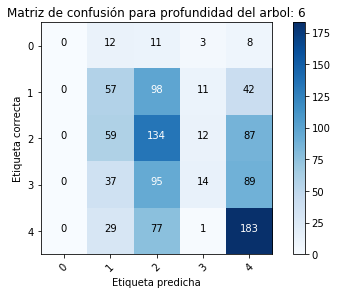


# Exploración de hiperparámetros para profundidad del arbol igual a 7

Mejor conjunto de parámetros:
{'criterion': 'entropy', 'max_leaf_nodes': 50, 'min_samples_leaf': 5, 'min_samples_split': 150, 'presort': True}

Exactitud del mejor conjunto de parametros: 0.377

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de evaluacion: 0.373 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        34
         1.0       0.36      0.28      0.32       208
         2.0       0.33      0.49      0.40       292
         3.0       0.20      0.04      0.06       235
         4.0       0.44      0.63      0.52       290

   micro avg       0.37      0.37      0.37      1059
   macro avg       0.27      0.29      0.26      1059
weighted avg       0.33      0.37      0.33      1059




/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


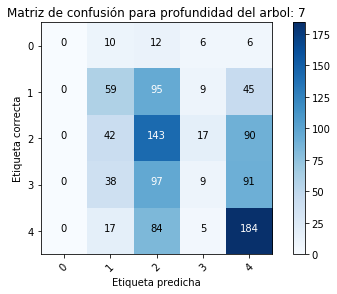


# Exploración de hiperparámetros para profundidad del arbol igual a 8

Mejor conjunto de parámetros:
{'criterion': 'entropy', 'max_leaf_nodes': 50, 'min_samples_leaf': 50, 'min_samples_split': 150, 'presort': True}

Exactitud del mejor conjunto de parametros: 0.377

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de evaluacion: 0.366 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        34
         1.0       0.34      0.37      0.36       208
         2.0       0.31      0.45      0.37       292
         3.0       0.33      0.03      0.05       235
         4.0       0.44      0.60      0.51       290

   micro avg       0.37      0.37      0.37      1059
   macro avg       0.29      0.29      0.26      1059
weighted avg       0.35      0.37      0.32      1059




/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


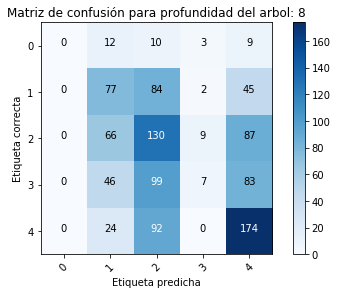


# Exploración de hiperparámetros para profundidad del arbol igual a 10

Mejor conjunto de parámetros:
{'criterion': 'gini', 'max_leaf_nodes': 50, 'min_samples_leaf': 5, 'min_samples_split': 150, 'presort': True}

Exactitud del mejor conjunto de parametros: 0.378

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de evaluacion: 0.372 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        34
         1.0       0.30      0.27      0.28       208
         2.0       0.33      0.40      0.36       292
         3.0       0.36      0.14      0.20       235
         4.0       0.44      0.65      0.53       290

   micro avg       0.37      0.37      0.37      1059
   macro avg       0.29      0.29      0.27      1059
weighted avg       0.35      0.37      0.34      1059




/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


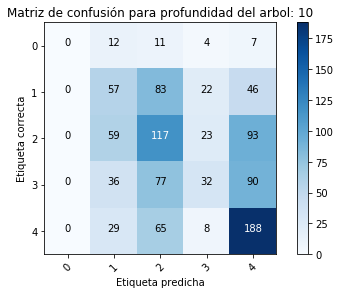


El mejor clasificador es: 
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=50,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=150,
            min_weight_fraction_leaf=0.0, presort=True, random_state=42,
            splitter='best')

0.38002730232069726



In [25]:
plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
accuracy=0.0
results = pd.DataFrame(columns=('clf', 'best_acc'))

for idx, depth in enumerate((3, 5, 6, 7, 8, 10), start=1):
    tree_param = {
              'criterion' : [ 'gini', 'entropy' ], 
              'min_samples_leaf' : [ 5, 30, 50, 100, 150 ],
              'min_samples_split' : [ 30, 50, 100, 150 ], #  
              'max_leaf_nodes': [ 2, 5, 10, 30, 40, 50 ],
              'presort': [ True ],
              #'max_features': [ 100 , 200 ]
              # 'class_weight' : [ 'balanced' ]
    }
    tree = DT(max_depth=depth, random_state=42)
    tree_clf = GridSearchCV(tree, tree_param, scoring='accuracy', cv=5)
    tree_clf.fit(X_train.drop(["PID"], axis=1), y_train)
    
    print("# Exploración de hiperparámetros para profundidad del arbol igual a %d" % depth, end="\n\n")
    
    print("Mejor conjunto de parámetros:")
    print(tree_clf.best_params_, end="\n\n")
    print("Exactitud del mejor conjunto de parametros: %0.3f" % tree_clf.best_score_, end="\n\n")

    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    y_true, y_pred = y_valid, tree_clf.predict(X_valid.drop(["PID"], axis=1))
    accuracy_test = accuracy_score(y_true, y_pred)
    print("Exactitud para conjunto de evaluacion: %0.3f " % accuracy_test)
    print(classification_report(y_true, y_pred), end="\n\n")
    
    plt.subplot(1, 1, 1)
    plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes=('0', '1', '2', '3', '4'), title="Matriz de confusión para profundidad del arbol: %d" % depth)
    plt.show()
    print("================================================", end="\n\n")
    
    if(tree_clf.best_score_ > accuracy):
        results = results.append({'clf': tree_clf.best_estimator_, 'best_acc': tree_clf.best_score_}, ignore_index=True)

print('El mejor clasificador es: ')
print(results.loc[results['best_acc'].idxmax()]['clf'], end="\n\n")
print(results.loc[results['best_acc'].idxmax()]['best_acc'], end="\n\n")

**And finally**, we predict the unknown label for the testing set

In [26]:
X_v1.shape, XX_v1.shape

((10582, 62), (4411, 62))

In [27]:
yy = results.clf.iloc[0].predict(XX_v1.drop(["PID"], axis=1))
yy = yy.astype(np.int)

The last thing we do is generating a file that should be *submitted* on kaggle

In [28]:
submission = pd.DataFrame(list(zip(XX_v1.PID, yy)), columns=["PID", "AdoptionSpeed"])

In [29]:
submission.to_csv("kaggle/submission_dt.csv", header=True, index=False)

***KNN VECINOS MAS CERCANOS***

# Exploración de hiperparámetros para canitdad de vecinos igual a 5

Mejor conjunto de parámetros:
{'algorithm': 'auto', 'p': 2, 'weights': 'distance'}

Exactitud del mejor conjunto de parametros: 0.333

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de evaluacion: 0.323 
              precision    recall  f1-score   support

         0.0       0.38      0.09      0.14        34
         1.0       0.24      0.25      0.25       208
         2.0       0.31      0.33      0.32       292
         3.0       0.28      0.26      0.27       235
         4.0       0.42      0.44      0.43       290

   micro avg       0.32      0.32      0.32      1059
   macro avg       0.33      0.28      0.28      1059
weighted avg       0.32      0.32      0.32      1059




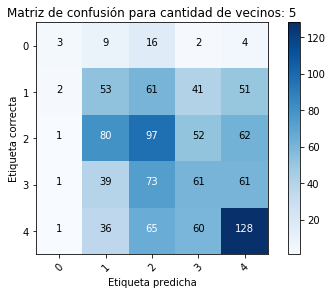


# Exploración de hiperparámetros para canitdad de vecinos igual a 8

Mejor conjunto de parámetros:
{'algorithm': 'auto', 'p': 2, 'weights': 'distance'}

Exactitud del mejor conjunto de parametros: 0.342

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de evaluacion: 0.338 
              precision    recall  f1-score   support

         0.0       0.33      0.06      0.10        34
         1.0       0.26      0.26      0.26       208
         2.0       0.32      0.34      0.33       292
         3.0       0.27      0.21      0.24       235
         4.0       0.45      0.52      0.48       290

   micro avg       0.34      0.34      0.34      1059
   macro avg       0.32      0.28      0.28      1059
weighted avg       0.33      0.34      0.33      1059




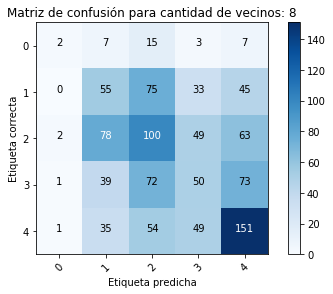


# Exploración de hiperparámetros para canitdad de vecinos igual a 15

Mejor conjunto de parámetros:
{'algorithm': 'auto', 'p': 1, 'weights': 'distance'}

Exactitud del mejor conjunto de parametros: 0.355

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de evaluacion: 0.346 
              precision    recall  f1-score   support

         0.0       0.67      0.06      0.11        34
         1.0       0.27      0.27      0.27       208
         2.0       0.31      0.34      0.33       292
         3.0       0.31      0.23      0.27       235
         4.0       0.44      0.53      0.48       290

   micro avg       0.35      0.35      0.35      1059
   macro avg       0.40      0.29      0.29      1059
weighted avg       0.35      0.35      0.34      1059




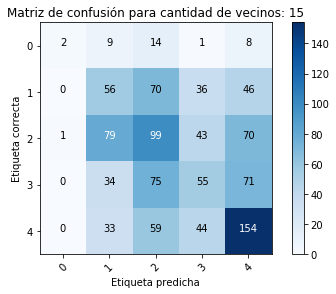


# Exploración de hiperparámetros para canitdad de vecinos igual a 21

Mejor conjunto de parámetros:
{'algorithm': 'auto', 'p': 2, 'weights': 'distance'}

Exactitud del mejor conjunto de parametros: 0.362

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de evaluacion: 0.350 
              precision    recall  f1-score   support

         0.0       0.50      0.03      0.06        34
         1.0       0.30      0.29      0.29       208
         2.0       0.32      0.33      0.32       292
         3.0       0.30      0.20      0.24       235
         4.0       0.42      0.58      0.49       290

   micro avg       0.35      0.35      0.35      1059
   macro avg       0.37      0.28      0.28      1059
weighted avg       0.34      0.35      0.33      1059




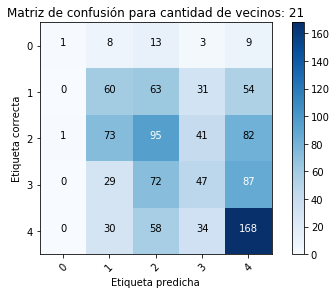


# Exploración de hiperparámetros para canitdad de vecinos igual a 24

Mejor conjunto de parámetros:
{'algorithm': 'auto', 'p': 2, 'weights': 'distance'}

Exactitud del mejor conjunto de parametros: 0.363

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de evaluacion: 0.359 
              precision    recall  f1-score   support

         0.0       0.50      0.03      0.06        34
         1.0       0.31      0.29      0.30       208
         2.0       0.32      0.34      0.33       292
         3.0       0.33      0.20      0.25       235
         4.0       0.42      0.59      0.49       290

   micro avg       0.36      0.36      0.36      1059
   macro avg       0.38      0.29      0.29      1059
weighted avg       0.35      0.36      0.34      1059




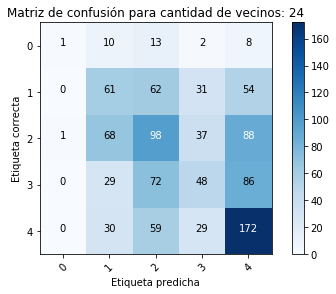


El mejor clasificador es: 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=24, p=2,
           weights='distance')

0.3633308831250656



In [31]:
accuracy=0.0
results_kn = pd.DataFrame(columns=('clf', 'best_acc'))

for idx, neighbors in enumerate(( 5, 8, 15, 21, 24), start=1): # , 4, 5, 6, 7, 8, 10, 15
    kn_param = {
              'weights' : [ 'uniform', 'distance', ], # 'distance'
              'algorithm' : [ 'auto' , 'ball_tree', 'kd_tree' ], # , 'ball_tree', 'kd_tree', 'brute'
              'p' : [ 1, 2 ], 
    }
    kn = KNeighborsClassifier(n_neighbors=neighbors, n_jobs=-1)
    kn_clf = GridSearchCV(kn, kn_param, scoring='accuracy', cv=5)
    kn_clf.fit(X_train.drop(["PID"], axis=1), y_train)
    
    print("# Exploración de hiperparámetros para canitdad de vecinos igual a %d" % neighbors, end="\n\n")
    
    print("Mejor conjunto de parámetros:")
    print(kn_clf.best_params_, end="\n\n")
    print("Exactitud del mejor conjunto de parametros: %0.3f" % kn_clf.best_score_, end="\n\n")

    if(kn_clf.best_score_ > accuracy):
        results_kn = results_kn.append({'clf': kn_clf.best_estimator_, 'best_acc': kn_clf.best_score_}, ignore_index=True)

    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    y_true, y_pred = y_valid, kn_clf.predict(X_valid.drop(["PID"], axis=1))
    print("Exactitud para conjunto de evaluacion: %0.3f " % accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred), end="\n\n")
    
    plt.subplot(1, 1, 1)
    plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes=('0', '1', '2', '3', '4'), title="Matriz de confusión para cantidad de vecinos: %d" % neighbors)
    plt.show()
    print("================================================", end="\n\n")

print('El mejor clasificador es: ')
print(results_kn.loc[results_kn['best_acc'].idxmax()]['clf'], end="\n\n")
print(results_kn.loc[results_kn['best_acc'].idxmax()]['best_acc'], end="\n\n")

In [32]:
yy = results_kn.clf.iloc[0].predict(XX_v1.drop(["PID"], axis=1))
yy = yy.astype(np.int)

In [33]:
submission = pd.DataFrame(list(zip(XX_v1.PID, yy)), columns=["PID", "AdoptionSpeed"])

In [34]:
submission.to_csv("kaggle/submission_kn.csv", header=True, index=False)

***LINEAR SVC***

# Exploración de hiperparámetros para cantidad maxima de iteraciones igual a 2000

Mejor conjunto de parámetros:
{'C': 0.0001, 'class_weight': 'balanced', 'dual': False, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'multi_class': 'ovr', 'penalty': 'l2', 'tol': 0.0001}

Exactitud del mejor conjunto de parametros: 0.344

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de evaluacion: 0.325 
              precision    recall  f1-score   support

         0.0       0.06      0.03      0.04        34
         1.0       0.23      0.29      0.26       208
         2.0       0.35      0.32      0.33       292
         3.0       0.29      0.13      0.18       235
         4.0       0.39      0.55      0.46       290

   micro avg       0.32      0.32      0.32      1059
   macro avg       0.26      0.26      0.25      1059
weighted avg       0.31      0.32      0.31      1059




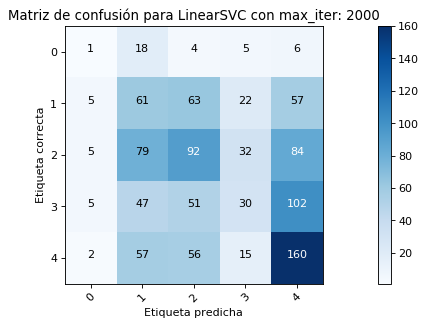


# Exploración de hiperparámetros para cantidad maxima de iteraciones igual a 4500

Mejor conjunto de parámetros:
{'C': 0.0001, 'class_weight': 'balanced', 'dual': False, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'multi_class': 'ovr', 'penalty': 'l2', 'tol': 0.0001}

Exactitud del mejor conjunto de parametros: 0.344

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de evaluacion: 0.325 
              precision    recall  f1-score   support

         0.0       0.06      0.03      0.04        34
         1.0       0.23      0.29      0.26       208
         2.0       0.35      0.32      0.33       292
         3.0       0.29      0.13      0.18       235
         4.0       0.39      0.55      0.46       290

   micro avg       0.32      0.32      0.32      1059
   macro avg       0.26      0.26      0.25      1059
weighted avg       0.31      0.32      0.31      1059




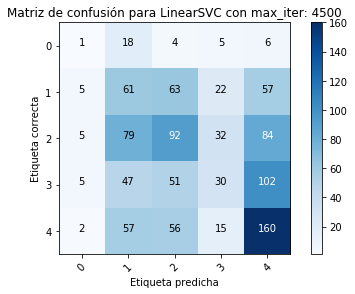


El mejor clasificador es: 
LinearSVC(C=0.0001, class_weight='balanced', dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=2000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

0.3444292764885015



In [27]:

plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
accuracy=0.0
results_svm = pd.DataFrame(columns=('clf', 'best_acc'))

for idx, max_iter in enumerate((2000, 4500), start=1):
    svm_param = {
              'penalty' : [ 'l2' ], 
              'loss' : ['squared_hinge' ], #   'hinge',   
              'dual' : [ False ],
              'multi_class': [ 'ovr' ], # , 'crammer_singer'
              'class_weight': [ 'balanced' ],
              'tol' : [ 0.001, 0.0001, 0.00001 ],
              'C'   : [ 0.01, 0.001, 0.0001 , 1.0, 2.0],
              'intercept_scaling': [ 0.01, 0.1, 1, 2, 5, 10, 50, 100 ]
    }
    svm = LinearSVC(max_iter=max_iter, random_state=42)
    svm_clf = GridSearchCV(svm, svm_param, scoring='accuracy', cv=5)
    svm_clf.fit(X_train.drop(["PID"], axis=1), y_train)
    
    print("# Exploración de hiperparámetros para cantidad maxima de iteraciones igual a %d" % max_iter, end="\n\n")
    
    print("Mejor conjunto de parámetros:")
    print(svm_clf.best_params_, end="\n\n")
    print("Exactitud del mejor conjunto de parametros: %0.3f" % svm_clf.best_score_, end="\n\n")

    if(svm_clf.best_score_ > accuracy):
        results_svm = results_svm.append({'clf': svm_clf.best_estimator_, 'best_acc': svm_clf.best_score_}, ignore_index=True)

    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    y_true, y_pred = y_valid, svm_clf.predict(X_valid.drop(["PID"], axis=1))
    print("Exactitud para conjunto de evaluacion: %0.3f " % accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred), end="\n\n")
    
    plt.subplot(1, 1, 1)
    plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes=('0', '1', '2', '3', '4'), title="Matriz de confusión para LinearSVC con max_iter: %d" % max_iter)
    plt.show()
    print("================================================", end="\n\n")

print('El mejor clasificador es: ')
print(results_svm.loc[results_svm['best_acc'].idxmax()]['clf'], end="\n\n")
print(results_svm.loc[results_svm['best_acc'].idxmax()]['best_acc'], end="\n\n")

In [37]:
yy = results_kn.clf.iloc[0].predict(XX_v1.drop(["PID"], axis=1))
yy = yy.astype(np.int)

In [38]:
submission = pd.DataFrame(list(zip(XX_v1.PID, yy)), columns=["PID", "AdoptionSpeed"])

In [39]:
submission.to_csv("kaggle/submission_LinearSVC.csv", header=True, index=False)

***C-Support Vector Classification***

In [ ]:

plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
accuracy=0.0
results_svc = pd.DataFrame(columns=('clf', 'best_acc'))

for idx, max_iter in enumerate((4000, 6000), start=1):
    svc_param = {
              'C'      : [ 1.0, 2.0, 3.0, 4.0], # , 2.0, 3.0, 4.0
              'degree' : [ 3, 6 ], # , 6  
              'kernel' : [ 'linear' , 'poly', 'rbf', 'sigmoid' ], # 'poly', 'rbf', 'sigmoid'      , 'precomputed'
              'probability' : [ True ],
              'class_weight': [ 'balanced' ],
              'tol' : [ 0.001 ], # 0.0001, 0.00001
              'decision_function_shape' : [ 'ovo', 'ovr' ], # , 'ovr'
              'gamma' : [ 'scale' ] 
              
    }
    svc = SVC(max_iter=max_iter, random_state=5)
    svc_clf = GridSearchCV(svc, svc_param, scoring='accuracy', cv=3)
    svc_clf.fit(X_train.drop(["PID"], axis=1), y_train)
    
    print("# Exploración de hiperparámetros para cantidad maxima de iteraciones igual a %d" % max_iter, end="\n\n")
    
    print("Mejor conjunto de parámetros:")
    print(svc_clf.best_params_, end="\n\n")
    print("Exactitud del mejor conjunto de parametros: %0.3f" % svc_clf.best_score_, end="\n\n")

    if(svc_clf.best_score_ > accuracy):
        results_svc = results_svc.append({'clf': svc_clf.best_estimator_, 'best_acc': svc_clf.best_score_}, ignore_index=True)

    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    y_true, y_pred = y_valid, svc_clf.predict(X_valid.drop(["PID"], axis=1))
    print("Exactitud para conjunto de evaluacion: %0.3f " % accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred), end="\n\n")
    
    plt.subplot(1, 1, 1)
    plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes=('0', '1', '2', '3', '4'), title="Matriz de confusión para SVC con max_iter: %d" % max_iter)
    plt.show()
    print("================================================", end="\n\n")

print('El mejor clasificador es: ')
print(results_svc.loc[results_svc['best_acc'].idxmax()]['clf'], end="\n\n")
print(results_svc.loc[results_svc['best_acc'].idxmax()]['best_acc'], end="\n\n")

***Random Forest***

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

# Exploración de hiperparámetros para profundidad del arbol igual a 3

Mejor conjunto de parámetros:
{'criterion': 'gini', 'min_samples_leaf': 30}

Exactitud del mejor conjunto de parametros: 0.349

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de evaluacion: 0.354 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        34
         1.0       0.38      0.01      0.03       208
         2.0       0.33      0.63      0.43       292
         3.0       0.00      0.00      0.00       235
         4.0       0.39      0.65      0.48       290

   micro avg       0.35      0.35      0.35      1059
   macro avg       0.22      0.26      0.19      1059
weighted avg       0.27      0.35      0.26      1059




/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


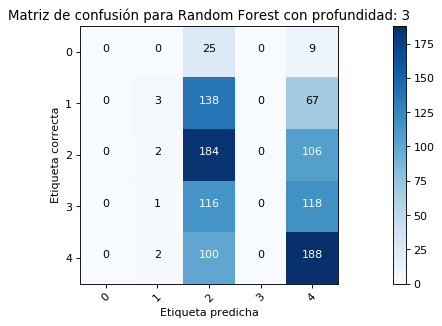

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

# Exploración de hiperparámetros para profundidad del arbol igual a 5

Mejor conjunto de parámetros:
{'criterion': 'entropy', 'min_samples_leaf': 5}

Exactitud del mejor conjunto de parametros: 0.364

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de evaluacion: 0.374 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        34
         1.0       0.33      0.17      0.22       208
         2.0       0.33      0.62      0.43       292
         3.0       0.40      0.01      0.02       235
         4.0       0.44      0.62      0.52       290

   micro avg       0.37      0.37      0.37      1059
   macro avg       0.30      0.28      0.24      1059
weighted avg       0.37      0.37      0.31      1059




/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


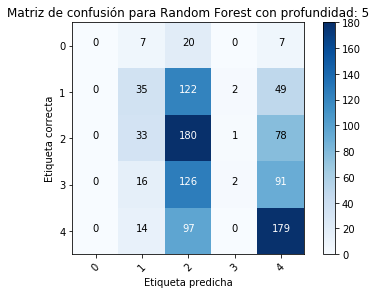

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

# Exploración de hiperparámetros para profundidad del arbol igual a 6

Mejor conjunto de parámetros:
{'criterion': 'entropy', 'min_samples_leaf': 30}

Exactitud del mejor conjunto de parametros: 0.372

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de evaluacion: 0.374 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        34
         1.0       0.27      0.14      0.19       208
         2.0       0.34      0.59      0.43       292
         3.0       0.55      0.03      0.05       235
         4.0       0.43      0.64      0.52       290

   micro avg       0.37      0.37      0.37      1059
   macro avg       0.32      0.28      0.24      1059
weighted avg       0.39      0.37      0.31      1059




/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


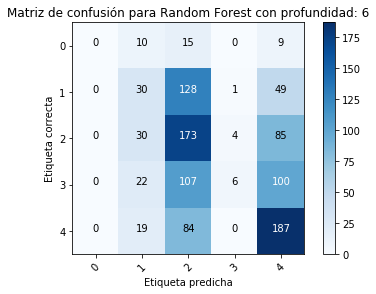

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

# Exploración de hiperparámetros para profundidad del arbol igual a 7

Mejor conjunto de parámetros:
{'criterion': 'entropy', 'min_samples_leaf': 5}

Exactitud del mejor conjunto de parametros: 0.374

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de evaluacion: 0.375 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        34
         1.0       0.30      0.19      0.23       208
         2.0       0.34      0.55      0.42       292
         3.0       0.35      0.03      0.06       235
         4.0       0.43      0.65      0.52       290

   micro avg       0.37      0.37      0.37      1059
   macro avg       0.28      0.28      0.25      1059
weighted avg       0.35      0.37      0.32      1059




/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


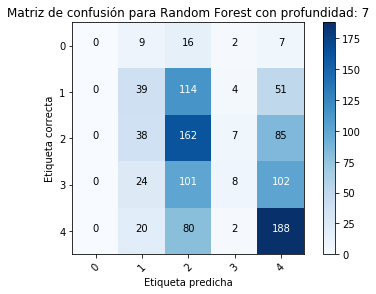

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

# Exploración de hiperparámetros para profundidad del arbol igual a 8

Mejor conjunto de parámetros:
{'criterion': 'gini', 'min_samples_leaf': 5}

Exactitud del mejor conjunto de parametros: 0.380

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de evaluacion: 0.377 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        34
         1.0       0.31      0.20      0.24       208
         2.0       0.34      0.52      0.41       292
         3.0       0.37      0.09      0.15       235
         4.0       0.44      0.63      0.52       290

   micro avg       0.38      0.38      0.38      1059
   macro avg       0.29      0.29      0.26      1059
weighted avg       0.36      0.38      0.34      1059




/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


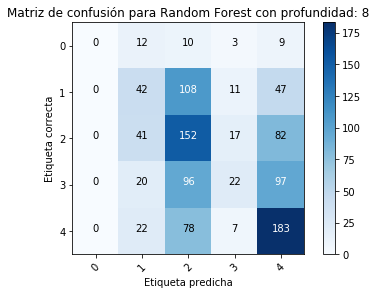

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

# Exploración de hiperparámetros para profundidad del arbol igual a 10

Mejor conjunto de parámetros:
{'criterion': 'gini', 'min_samples_leaf': 5}

Exactitud del mejor conjunto de parametros: 0.376

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de evaluacion: 0.372 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        34
         1.0       0.27      0.24      0.25       208
         2.0       0.34      0.46      0.39       292
         3.0       0.33      0.11      0.17       235
         4.0       0.46      0.63      0.53       290

   micro avg       0.37      0.37      0.37      1059
   macro avg       0.28      0.29      0.27      1059
weighted avg       0.35      0.37      0.34      1059




/home/architect/anaconda3/envs/diplodatos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


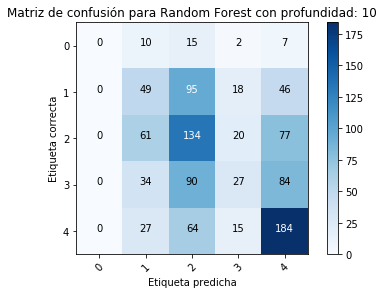


El mejor clasificador es: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

0.3802373201722146



In [38]:
plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
accuracy=0.0
results_rf = pd.DataFrame(columns=('clf', 'best_acc'))

for idx, depth in enumerate((3, 5, 6, 7, 8, 10), start=1):
    rf_param = {
              'criterion' : [ 'gini', 'entropy' ], 
              'min_samples_leaf' : [ 5, 30, 50, 100, 150 ],
              #'min_samples_split' : [ 30, 50, 100, 150 ], #  
              #'max_leaf_nodes': [ 2, 5, 10, 30, 40, 50 ], #
              #'n_estimators' : [ 25, 50, 100, 200 ], 
              #'class_weight' : [ 'balanced' ],
              #'min_impurity_decrease': [ 0.1, 0.01, 0.001, 0.0001 ],
              #'bootstrap': [ False ]
    }
    rf = RF(max_depth=depth, random_state=42, n_jobs=-1)
    rf_clf = GridSearchCV(rf, rf_param, scoring='accuracy', cv=5)
    rf_clf.fit(X_train.drop(["PID"], axis=1), y_train)
    
    print("# Exploración de hiperparámetros para profundidad del arbol igual a %d" % depth, end="\n\n")
    
    print("Mejor conjunto de parámetros:")
    print(rf_clf.best_params_, end="\n\n")
    print("Exactitud del mejor conjunto de parametros: %0.3f" % rf_clf.best_score_, end="\n\n")

    if(rf_clf.best_score_ > accuracy):
        results_rf = results_rf.append({'clf': rf_clf.best_estimator_, 'best_acc': rf_clf.best_score_}, ignore_index=True)

    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    y_true, y_pred = y_valid, rf_clf.predict(X_valid.drop(["PID"], axis=1))
    print("Exactitud para conjunto de evaluacion: %0.3f " % accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred), end="\n\n")
    plt.subplot(1, 1, 1)
    plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes=('0', '1', '2', '3', '4'), title="Matriz de confusión para Random Forest con profundidad: %d" % depth)
    plt.show()
    
    print("================================================", end="\n\n")

print('El mejor clasificador es: ')
print(results_rf.loc[results_rf['best_acc'].idxmax()]['clf'], end="\n\n")
print(results_rf.loc[results_rf['best_acc'].idxmax()]['best_acc'], end="\n\n")

In [40]:
yy = results_rf.clf.iloc[0].predict(XX_v1.drop(["PID"], axis=1))
yy = yy.astype(np.int)

In [41]:
submission = pd.DataFrame(list(zip(XX_v1.PID, yy)), columns=["PID", "AdoptionSpeed"])

In [42]:
submission.to_csv("kaggle/submission_RandomForest.csv", header=True, index=False)

***Gradient Boosting Classifier***

In [39]:
plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
accuracy=0.0
results_gbc = pd.DataFrame(columns=('clf', 'best_acc'))

for idx, depth in enumerate((3, 5, 6, 7, 8, 10), start=1):
    gbc_param = {
              'loss' : ['deviance', ], # 'exponential'
              #'learning_rate': [ 0.1, 0.001, 0.0001 ],
              #'n_estimators' : [ 50, 100, 200 ],
              #'subsample': [ 0.01, 0.1, 0.5, 1.0 ],
              'criterion' : [ 'friedman_mse' ], # 'mse', 'mae'
              #'min_samples_split' : [ 30, 50, 100, 150 ],
              #'min_samples_leaf' : [ 5, 30, 50, 100, 150 ],
              #'min_impurity_decrease': [ 0.1, 0.01, 0.001, 0.0001 ],
              #'max_leaf_nodes': [ 2, 5, 10, 30, 40, 50 ],
    }
    gbc = GradientBoostingClassifier(max_depth=depth, random_state=42)
    gbc_clf = GridSearchCV(gbc, gbc_param, scoring='accuracy', cv=5)
    gbc_clf.fit(X_train.drop(["PID"], axis=1), y_train)
    
    print("# Exploración de hiperparámetros para profundidad del arbol igual a %d" % depth, end="\n\n")
    
    print("Mejor conjunto de parámetros:")
    print(gbc_clf.best_params_, end="\n\n")
    print("Exactitud del mejor conjunto de parametros: %0.3f" % gbc_clf.best_score_, end="\n\n")

    if(gbc_clf.best_score_ > accuracy):
        results_gbc = results_gbc.append({'clf': gbc_clf.best_estimator_, 'best_acc': gbc_clf.best_score_}, ignore_index=True)

    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    y_true, y_pred = y_valid, gbc_clf.predict(X_valid.drop(["PID"], axis=1))
    print("Exactitud para conjunto de evaluacion: %0.3f " % accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred), end="\n\n")
    
    print("================================================", end="\n\n")

print('El mejor clasificador es: ')
print(results_gbc.loc[results_gbc['best_acc'].idxmax()]['clf'], end="\n\n")
print(results_gbc.loc[results_gbc['best_acc'].idxmax()]['best_acc'], end="\n\n")

# Exploración de hiperparámetros para profundidad del arbol igual a 3

Mejor conjunto de parámetros:
{'criterion': 'friedman_mse', 'loss': 'deviance'}

Exactitud del mejor conjunto de parametros: 0.389

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para conjunto de evaluacion: 0.379 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        34
         1.0       0.29      0.26      0.28       208
         2.0       0.34      0.45      0.39       292
         3.0       0.38      0.11      0.17       235
         4.0       0.45      0.66      0.54       290

   micro avg       0.38      0.38      0.38      1059
   macro avg       0.29      0.29      0.27      1059
weighted avg       0.36      0.38      0.35      1059



# Exploración de hiperparámetros para profundidad del arbol igual a 5

Mejor conjunto de parámetros:
{'criterion': 'friedman_mse', 'loss': 'deviance'}

Exactitud del mejor con

<Figure size 1120x320 with 0 Axes>

In [43]:
yy = results_gbc.clf.iloc[0].predict(XX_v1.drop(["PID"], axis=1))
yy = yy.astype(np.int)

In [44]:
submission = pd.DataFrame(list(zip(XX_v1.PID, yy)), columns=["PID", "AdoptionSpeed"])

In [45]:
submission.to_csv("kaggle/submission_GradientBoostingClf.csv", header=True, index=False)